# 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [1]:
import selenium
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains
from bs4 import BeautifulSoup as bsp
import bs4
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "path/chromedriver"
driver = webdriver.Chrome(path)
driver.maximize_window()

site = "https://www.instagram.com/"
driver.get(site)

In [3]:
def Login(driver, username, userpwd):
    login = False
    wait = WebDriverWait(driver, 5)
    try:
        wait.until(EC.presence_of_element_located((By.NAME,"username")))
        user = driver.find_element_by_name("username")
        user.send_keys(username)
        
        password = driver.find_element_by_name("password")
        password.send_keys(userpwd)
        
        login_btn = driver.find_element_by_class_name("y3zKF")
        login_btn.submit()
        login = True
        
    except Exception:
        login = False
        
    if login:
        remove_login_info(driver, wait)
        remove_popup(driver, wait)
    
    return login
def remove_login_info(driver, wait):
    try :
        nt_nw_path = "/html/body/div[1]/section/main/div/div/div/div/button"
        not_now = wait.until(EC.element_to_be_clickable((By.XPATH,nt_nw_path)))
        not_now.click()
    except Exception:
        return 
    
def remove_popup(driver, wait):
    try:
        popup_path = '//button[contains(@class, "HoLwm")]'
        not_now_btn = wait.until(EC.element_to_be_clickable((By.XPATH,popup_path)))
        not_now_btn.click()
    except NoSuchElementException:
        return False

In [4]:
username = "SAMPLE USERNAME"
userpwd = "SAMPLE PASSWORD"
if Login(driver, username, userpwd):
    print("Login Successfully")
else:
    print("Please Try again")

Login Successfully


### 1. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [8]:
def Search(driver, srch_str): #Function to search the accounts
    search = driver.find_element_by_class_name("XTCLo") #Path of search button
    search.clear() #Clear previous Search results if any
    search.send_keys(srch_str) #Send keys for nwe search 
    time.sleep(2) #Time to open new site
    
def str_to_int(str_): #Function to get followers as integer
    str_ = str(str_) 
    str_ = str_.replace(",", "") #Converting string followers to integer
    for i in str_:
        if i == ".": 
            str_ = str_.replace(".", "")
            str_ = str_.replace("k", "00") #Replace "K" followes to 1000 round off fig 
            str_ = str_.replace("m", "00000") #Replace "M" followers to 100,000 Million rounf off fig
        else:
            str_ = str_.replace("k", "000")
            str_ = str_.replace("m", "000000")            
    str_ = int(str_)
    return str_

def get_followers_number(driver): #Function to return followers
    path = "/html/body/div[1]/section/main/div/header/section/ul/li[2]/a/span" #path of 
    k = driver.find_element_by_xpath(path).get_attribute("innerHTML") #Get the followes ar string
    k = str_to_int(k)
    return k

In [9]:
Search(driver, "food") #Search for food to get a list of top 10 results
wait = WebDriverWait(driver, 3)
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "qyrsm")))
search_li = driver.find_elements_by_class_name("qyrsm")

food_li = [] #Saving result as list since seacrh result may differ every time search 
for i in search_li[8:]: 
    if len(food_li)>9:
        break
    if i.get_attribute("innerHTML")[0] != "#": #removing hastags 
        food_li.append(i.get_attribute("innerHTML"))

srch_path = "//div/div[2]/div[1]" #Search result path
food_dict = {} #Saving accts and followers as dic to sort easily
for i in food_li:
    k = Search(driver, i)
    time.sleep(2)
    open_acc = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3"))) #Open account to get the followers number
    open_acc.click()
    time.sleep(2) #time to open the account
    flwrs =  get_followers_number(driver)
    food_dict[i] = flwrs
food_list = []
food_dict
food_dict = {key: value for key, value in sorted(food_dict.items(), key=lambda item: item[1], reverse = True)[:5]} #Sort the dict to get top 5 account

print("List of Top 5 insta handles with maximum followers")
for i in food_dict:
    food_list.append(i)
    print(i)
    
driver.get("https://www.instagram.com/") #Back to home page to ensure search is complete

List of Top 5 insta handles with maximum followers
thefoodranger
dilsefoodie
food.darzee
ludhiana_foodiess
nehapix


### 2. Now Find the number of posts these handles have done in the previous 3 days.

In [10]:
def post_date(driver):
    i = 0 #counter
    while True:
        driver.execute_script("window.scrollBy(0, 1000)") #Scrolling insta handles to reload the posts
        try:
            time.sleep(2) #Time to load the data
            post_path = "//div[1]/div[1]/a/div[1]/div[2]" #path of post
            post = driver.find_elements_by_class_name("_9AhH0")
            post[i].click()
            i = i+1 #Increarse the count 
            path_post_time = "//div[3]/div[2]/a/time" #Path of time of post
            a = WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.XPATH, path_post_time))) 
            time_ = a.get_attribute("innerHTML") #Retireve the time  
            
            if "minute" in time_: #If condition for posts posted in last hour
                cancle_path = "//div[5]/div[3]/button"
                cancle = driver.find_element_by_xpath(cancle_path)
                cancle.click()
            
            if "hour" in time_: #If condition for posts posted in last day
                cancle_path = "//div[5]/div[3]/button"
                cancle = driver.find_element_by_xpath(cancle_path)
                cancle.click()        
            
            if ("1 day" in time_) or ("2 day" in time_) or  ("3 day" in time_):#If condition for posts posted in last 3 days
                cancle_path = "//div[5]/div[3]/button"
                cancle = driver.find_element_by_xpath(cancle_path)
                cancle.click()

        except Exception: #Element error means posts has retrieved time to close the loop
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()
            return i #return count of posts

In [11]:
food_posts = {} #Saving accts and followers as dic to sort easily
for i in food_list:
    k = Search(driver, i)
    print("Number of posts of", i,"in last 3 days", end = " ")
    time.sleep(2)
    open_acc = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3"))) #Open account to get the followers number
    open_acc.click()
    time.sleep(2) #time to open the account
    count = post_date(driver)
    food_posts[i] = count-1
    print(count - 1) #One Insta Handle completed
    
driver.get("https://www.instagram.com") #return to home page

Number of posts of thefoodranger in last 3 days 1
Number of posts of dilsefoodie in last 3 days 3
Number of posts of food.darzee in last 3 days 8
Number of posts of ludhiana_foodiess in last 3 days 0
Number of posts of nehapix in last 3 days 0


### 3. Depict this information using a suitable graph.

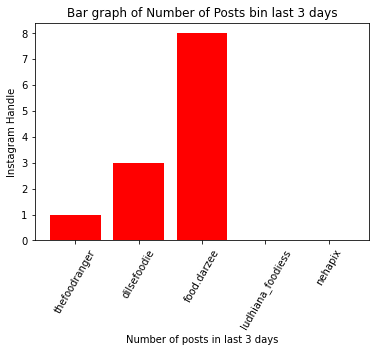

In [12]:
count_list = []
for i in food_posts:
    count_list.append(food_posts[i])
#graph
plt.bar(food_list, count_list, color = "red")
plt.xticks(rotation = 60)
plt.title("Bar graph of Number of Posts bin last 3 days")
plt.xlabel("Number of posts in last 3 days")
plt.ylabel("Instagram Handle")
plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [13]:
def last_comments(driver):
    time.sleep(5)
    for i in range(10):
        try:
            time.sleep(2) #Time to load the data
            post_path = "/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span" #path of post
            post = driver.find_elements_by_class_name("_9AhH0")
            post[i].click() #Open the post
            
            content_path = "/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span" #path of comment
            wait.until(EC.presence_of_element_located((By.XPATH, content_path)))
            content_ = driver.find_element_by_xpath(content_path)
            data = bsp(content_.get_attribute("innerHTML"),"html.parser") #using Beautiful Soup to retreive text
            print()
            print(i+1, ".",data.text)
            print("--------------------------------------------------")
            print()
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()            

        except Exception: #Element error means posts has retrieved time to close the loop
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()

In [14]:
print("Instagram Handles and there latest 10 posts content")
for i in food_list:
    k = Search(driver, i) #searcf the account
    print(i)
    print()
    time.sleep(2)
    open_acc = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3"))) #Open account to get the followers number
    open_acc.click()
    time.sleep(2) #time to open the account
    comments = last_comments(driver)
    print("-------------------------------------------------------------------------------") #One Insta Handle completed

driver.get("https://www.instagram.com") #return to home page

Instagram Handles and there latest 10 posts content
thefoodranger


1 . Woww!!! Just finished eating this amazing South Indian banana leaf feast in Kuala Lumpur at @balasbananaleaf !!! It was an honour to meet @fazleyyaakob who won  Masterchef Celebrity Malaysia and have him explain all of the ingredients and all about the food as well! He  showed us how their incredible mutton leg curry was made, one of my favourite dishes at the restaurant. And it will be coming out soon on YouTube!! Ting and I often go to balas now for South Indian feasts as the flavour is amazing!!! Hope you're all doing well and safe and having a nice day with delicious food!!
--------------------------------------------------


2 . Biggest Roti making in the world! Went for a nice lunch today at Kayu!Nasi Kandar is a must eat food in Malaysia!  Went for a full on curry and huge roti feast today @kayunasikandar
--------------------------------------------------


3 . Went for a mid day lunch craving banana leaf!!!

food.darzee


1 . When it comes to food, the raw ingredients play a very important role in the nutritive value of the dish. That’s why, we believe in sourcing the most healthy vegetables and have then thoroughly washed and sanitized before it is used in any meal.#RawIngredients #vegetables #rawvegetables #rawfoods #healthyfoods #eathealthy #eattasty #nutrition #Sanitation #cleanveggies #cleancooking #fooddarzee #keytoyourhealth
--------------------------------------------------


2 . Can you match the following with their right benefits? Share your answers in the comments below and get a chance to win free goodies from Swisse.Don't forget to tag your 3 friends,  @food.darzee & @swisseinAlso,visit www.swisse.co.in to get upto 50% off + extra 15% off on entire Swisse Range. Use code SWISSE15. #swisseindia #swisse #feelsgoodonswisse #fooddarzee #nutrition #keytoyourhealth
--------------------------------------------------


3 . A light meal during these hot summers is just what you need. 


4 . Let's hv a look at some of the best places to visit in ludhiana.....Must comment down ur favorite. . . . #bhaaji #mumbai #streetfood #foodporn #food #foods #foodphotography #foodstagram #foodie #foodies #foodblogger #insta #instagram #instalike #mahisharma#daljitdosanjh #dilpreetdhillon #likeforlikes#likeforfollow#weekendtodmoon #followforfollowback #indianfood #indianfoodbloggers #foodblogger #butter #onion #champ #pavbhaji #pizza
--------------------------------------------------


5 . Naturals(Dandi Swami) has opened up his another outlet now in Model Town..Swipe to know what i ordered 😍.. Swipe swipe swipe 👉👉.. In frame -Pav BhajiVege PIZZA 🍕Garlic Champ 😋..Undoubtedly from Taste to Quality to Quantity to Price everything is just amazing at Naturals ❤️. .Tag all your foodie friends who are crazy about Pav Bhaji ! ....DM us for promotions and collaborations 🌟....#pao #bhaaji #mumbai #streetfood #foodporn #food #foods #foodphotography #foodstagram #foodie #foodies #foodblogger #

### 2. Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [15]:
def return_dict(driver, dict_words):
    time.sleep(5)
    for i in range(10):
        try:
            time.sleep(2) #Time to load the data
            post_path = "/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span" #path of post
            post = driver.find_elements_by_class_name("_9AhH0")
            post[i].click() #Open the post
            
            content_path = "/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span" #path of comment
            wait.until(EC.presence_of_element_located((By.XPATH, content_path)))
            content_ = driver.find_elements_by_xpath(content_path)
            data = bsp(content_[0].get_attribute("innerHTML"),"html.parser") #using Beautiful Soup to retreive text

            data_text = str(data.text).split(" ") #Spliting words on the basis of space
            
            for j in data_text:
                dict_words[j] = dict_words.get(j, 0)+1 #creating a dictionary
                
            #Cancling the recent post 
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()            

        except Exception: #Element error means comments has retrieved time to close the loop
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()
    return dict_words

In [17]:
dict_words = {} #Dictionary of words
for i in food_list:
    k = Search(driver, i)
    time.sleep(2) #Search account
    open_acc = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3"))) #Open account to get the followers number
    open_acc.click()
    time.sleep(2) #time to open the account
    dict_words = return_dict(driver, dict_words)
driver.get("https://www.instagram.com") #return to home page

print("Words and there frequency")
for i in dict_words:
    print(i, dict_words[i]) #printing the dictionary of words

Words and there frequency
Woww!!! 1
Just 2
finished 2
eating 2
this 15
amazing 4
South 2
Indian 3
banana 2
leaf 1
feast 3
in 33
Kuala 2
Lumpur 1
at 12
@balasbananaleaf 2
!!! 1
It 3
was 11
an 5
honour 3
to 51
meet 1
@fazleyyaakob 1
who 3
won 1
 12
Masterchef 1
Celebrity 1
Malaysia 10
and 80
have 10
him 1
explain 1
all 16
of 36
the 73
ingredients 2
about 3
food 7
as 11
well! 1
He 1
showed 1
us 4
how 2
their 3
incredible 2
mutton 1
leg 1
curry 3
made, 1
one 5
my 17
favourite 4
dishes 3
restaurant. 2
And 17
it 13
will 7
be 10
coming 2
out 10
soon 3
on 13
YouTube!! 1
Ting 1
I 26
often 1
go 5
balas 1
now 6
for 38
feasts 1
flavour 1
is 27
amazing!!! 1
Hope 3
you're 1
doing 4
well 4
safe 1
having 4
a 40
nice 3
day 5
with 19
delicious 5
food!! 1
Biggest 1
Roti 1
making 4
world! 1
Went 3
lunch 4
today 2
Kayu!Nasi 1
Kandar 1
must 2
eat 3
Malaysia! 2
full 3
huge 1
roti 2
@kayunasikandar 1
mid 2
craving 2
leaf!!! 1
Sooo 1
delicious!!!!Went 1
world, 4
Mixed 1
Rice!! 1
extreme 1
salted 5
egg 5
fried 

🌞🌞🌞..Follow 1
#instalike#pozitivgrace 2
fame-💫Piña 1
colada 2
shake💫Garlic 1
momos💫The 1
piña 1
sweet 1
cocktail 1
coconut 1
pineapple 1
juice..Such 1
refreshing 1
😋.💫Mac 1
Fiery 1
Crispy 1
Garlic 1
Momos.. 1
crunchy 1
filling 1
inside..🔥Served 1
cream 1
salad 1
types 1
sauces 1
mint 1
schezwan 1
❤️📍@heraferifries... 1
Follow 2
#dilpreetdhillon 2
#pizza 3
hv 1
look 1
ludhiana.....Must 1
comment 1
ur 1
favorite. 1
. 5
#insta 2
#instagram 2
#instalike 2
#likeforlikes#likeforfollow#weekendtodmoon 2
Naturals(Dandi 1
Swami) 1
opened 1
his 1
another 1
outlet 1
Model 1
Town..Swipe 1
know 1
i 1
😍.. 1
Swipe 1
swipe 2
👉👉.. 1
frame 1
-Pav 1
BhajiVege 1
PIZZA 1
🍕Garlic 1
Champ 1
😋..Undoubtedly 1
Quality 1
Quantity 1
Price 1
Naturals 1
❤️. 1
.Tag 1
foodie 1
friends 1
Pav 2
Bhaji 1
....DM 1
promotions 1
collaborations 1
🌟....#pao 1
#love 1
#instapic 1
#picoftheday 1
#follow 1
Perfect 1
😍🤭 1
Vada 1
🤩😌...Where 1
:📍@datta_bhau_vada_pav..... 1
updates@ludhiana_foodiess@ludhiana_foodiess@ludhiana_foodies

### 3. Create a csv file with two columns : the word and its frequency

In [18]:
list_of_words = [] #List of list containg words and frequency
for i in dict_words:
    list_of_words.append([i, dict_words[i]])
    
df = pd.DataFrame(list_of_words, columns = ["Word", "Frequency"]) #Making pandas to convert into csv file

# Run only on final testing

In [19]:
df.to_csv("CSV_File_of_Words", index = False) #creating a csv file 
print("CSV file created")

CSV file created


### 4. Now, find the hashtags that were most popular among these bloggers

In [20]:
food_hash_dict = {key: value for key, value in sorted(dict_words.items(), key=lambda item: item[1], reverse = True)} #Sort the dict to get top 5 hashtags
list_of_hashtags = [] #List containg 5 hashtags
list_of_hastags_count = [] #Count of hashtag

for i in food_hash_dict:
    if len(i)>0:
        if  i[0] == "#" and len(list_of_hashtags)<5:
            list_of_hashtags.append(i)
            list_of_hastags_count.append(dict_words[i])
            print("Freqency of Hashtag", i,"is", dict_words[i])

Freqency of Hashtag #foodblogger is 10
Freqency of Hashtag #nutrition is 8
Freqency of Hashtag #keytoyourhealth is 8
Freqency of Hashtag #eathealthy is 7
Freqency of Hashtag #food is 6


### 5. Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

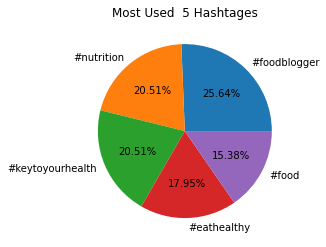

In [21]:
plt.pie(list_of_hastags_count, labels = list_of_hashtags, autopct = "%.2f%%") #Creating a Pie graph of hashtags
plt.title("Most Used  5 Hashtages")
plt.show()

# 3. You need to also calculate average followers : likes ratio for the obtained handles. Followers : Likes ratio is calculated as follows:

### 1. Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [26]:
def likes_count(driver):
    time.sleep(3)
    likes_arr = []
    for i in range(10):
        try:
            time.sleep(2) #Time to load the data
            post_path = "/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span" #path of post
            post = driver.find_elements_by_class_name("_9AhH0")
            post[i].click() #Open the post
            
            try : #path of posts
                like_path = "/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/a/span"
                likes_ = wait.until(EC.presence_of_element_located((By.XPATH, like_path)))
                likes = str_to_int(likes_.get_attribute("innerHTML"))
                print("Number of Likes on Post", i+1,likes)
                likes_arr.append(likes)
            
            except Exception: #path of videos and instagram reels
                like_path = "/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span/span"
                likes_ = wait.until(EC.presence_of_element_located((By.XPATH, like_path)))
                likes = str_to_int(likes_.get_attribute("innerHTML"))
                print("Number of Likes on Post", i+1,likes)
                likes_arr.append(likes)
                
            #Cancling the recent post 
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()            

        except Exception: #Element error means comments has retrieved time to close the loop
            print("Error")
            cancle_path = "//div[5]/div[3]/button"
            cancle = driver.find_element_by_xpath(cancle_path)
            cancle.click()
    return likes_arr

In [28]:
dict_likes = {} #Dictionary of words
print("Instagram handles and likes of latest 10 post")
for i in food_list:
    k = Search(driver, i)
    time.sleep(2) #Search account
    open_acc = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "-qQT3"))) #Open account to get the followers number
    open_acc.click()
    time.sleep(2) #time to open the account
    print(i)
    dict_likes[i] = likes_count(driver)
    print("-----------------------------------") #To visulize 
    print()
driver.get("https://www.instagram.com") #return to home page

Instagram handles and likes of latest 10 post
thefoodranger
Number of Likes on Post 1 18606
Number of Likes on Post 2 390205
Number of Likes on Post 3 234838
Number of Likes on Post 4 324997
Number of Likes on Post 5 341768
Number of Likes on Post 6 14784
Number of Likes on Post 7 115631
Number of Likes on Post 8 36524
Number of Likes on Post 9 37029
Number of Likes on Post 10 14050
-----------------------------------

dilsefoodie
Number of Likes on Post 1 202680
Number of Likes on Post 2 126196
Number of Likes on Post 3 97505
Number of Likes on Post 4 76468
Number of Likes on Post 5 92036
Number of Likes on Post 6 387802
Number of Likes on Post 7 4661
Number of Likes on Post 8 4625
Number of Likes on Post 9 6239
Number of Likes on Post 10 169501
-----------------------------------

food.darzee
Number of Likes on Post 1 280
Number of Likes on Post 2 711
Number of Likes on Post 3 499
Number of Likes on Post 4 588
Number of Likes on Post 5 837
Number of Likes on Post 6 5385
Number of Lik

### 2. Calculate the average likes for a handle

In [29]:
avg_likes = 0  #Varibale to get avg likes
ratio_avg_like = {} #Dict to visulize like and insta handles
for i in dict_likes:
    avg = sum(dict_likes[i])/10 #Avg likes of top 10 posts
    print("Avg likes of last 10 post of", i, avg) #printing the value
    ratio_avg_like[i] = avg #Creating a dictionary for further use

Avg likes of last 10 post of thefoodranger 152843.2
Avg likes of last 10 post of dilsefoodie 116771.3
Avg likes of last 10 post of food.darzee 1468.9
Avg likes of last 10 post of ludhiana_foodiess 410.9
Avg likes of last 10 post of nehapix 118.8


### 3. Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [30]:
list_ratio = [] #Dict of ration of likes to followers
for i in ratio_avg_like:
    ratio = ratio_avg_like[i]/food_dict[i] #Ratio
    list_ratio.append(ratio)
    print("Ratio of likes to followers of last 10 post of", i, ratio) #printing the ratios

Ratio of likes to followers of last 10 post of thefoodranger 0.1550133874239351
Ratio of likes to followers of last 10 post of dilsefoodie 0.15125816062176167
Ratio of likes to followers of last 10 post of food.darzee 0.013115178571428573
Ratio of likes to followers of last 10 post of ludhiana_foodiess 0.03735454545454545
Ratio of likes to followers of last 10 post of nehapix 0.01607142857142857


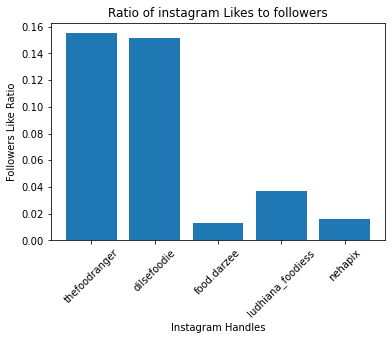

In [31]:
plt.bar(food_list, list_ratio)
plt.xticks(rotation = 45)
plt.title("Ratio of instagram Likes to followers")
plt.xlabel("Instagram Handles")
plt.ylabel("Followers Like Ratio")
plt.show()